In [2]:
import pandas as pd

In [3]:
wine_data = pd.read_csv('Documents/winequality-white.csv', 
                       names=['Fixed Acidity',
                             'Volatile Acidity',
                             'Citric Acid',
                             'Residual Sugar',
                             'Chlorides',
                             'Free Sulfur Dioxide',
                             'Total Sulfur Dioxide',
                             'Density',
                             'pH',
                             'Sulphates',
                             'Alcohol',
                             'Quality'],
                       skiprows=1,
                       sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In this case we have the quality feature is a categorical variable expressed in numeric form already.

In [4]:
wine_data['Quality'].unique() #there is 7 possible quality scores

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [7]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

from sklearn import preprocessing #Here we will standardize our X data by substracting the mean and dividing by the standard deviation
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Now we will use a Support Vector Machine classifier to perform classification using all the features of the input dataset.
We haven't performaed PCA yet.

In [8]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [9]:
accuracy = clf_svc.score(x_test, y_test)
print(accuracy)

0.49183673469387756


This accuracy is not very bad because random guesses would give us about 14% accuracy which means our model does much better.

### Now we will use dimensionality reduction to help if features are correlated with each other

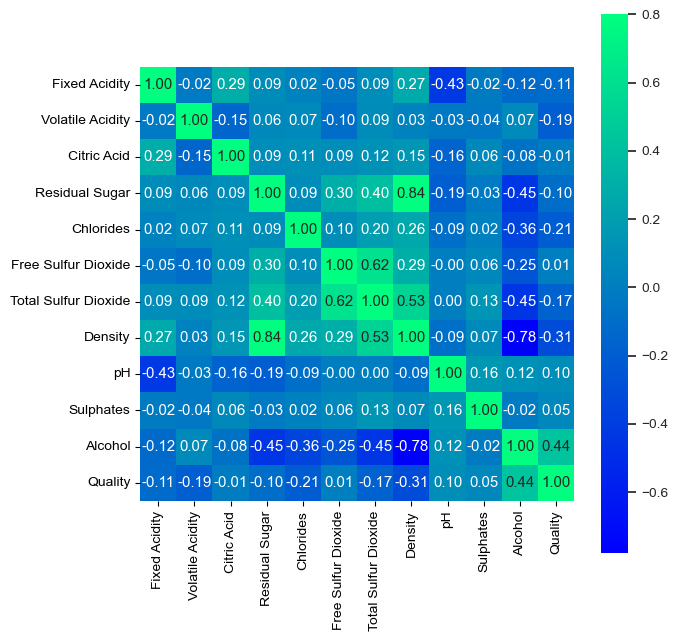

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns #library for visualization in order to see which of the input features 
                      # are strongly correlated with other input features
corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "winter")
plt.show()

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11, whiten=True)
X_reduced = pca.fit_transform(X)

In [14]:
pca.explained_variance_ # This variance member variable gives us the magnitude of 
                        # variation captured by each of the principle components.

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321, 0.7267464 , 0.59948087, 0.41422824, 0.28954625,
       0.0206533 ])

In [15]:
pca.explained_variance_ratio_ #this gives us the same information but in percentage terms.
                    #Some dimensions play a large role in defining the data.Others do not!

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942, 0.02631701,
       0.00187719])

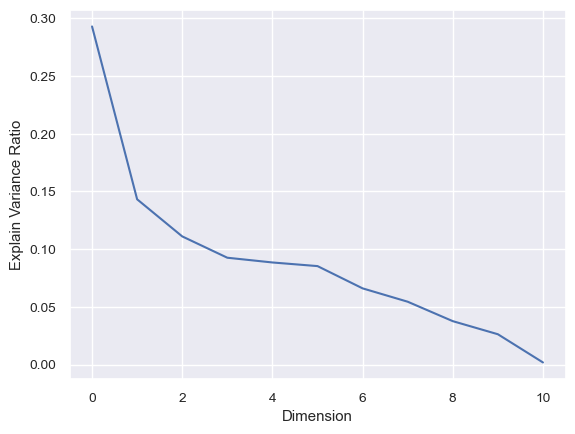

In [16]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

Notice that most of the variation in our input data is captured using just two dimensions.

###  Now let's use the principal components of our training data in order to perform classification using support vector machines.

In [17]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [18]:
accuracy = clf_svc_pca.score(x_test, y_test)
print(accuracy)

0.49183673469387756


## Now we will reduce the dimensionality to 9 dimensions

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9, whiten=True)
X_reduced = pca.fit_transform(X)

In [21]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321, 0.7267464 , 0.59948087, 0.41422824])

In [22]:
pca.explained_variance_ratio_ 

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942])

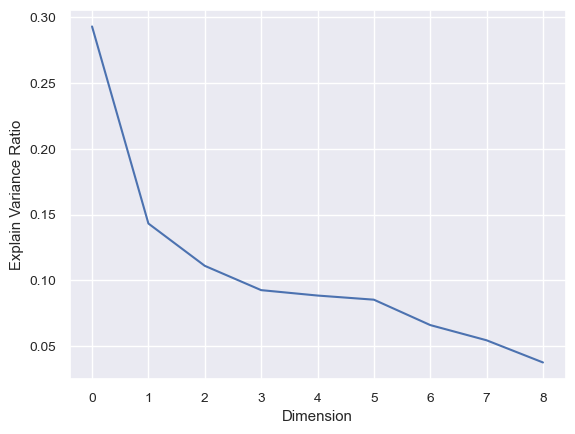

In [23]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

In [26]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l2', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

LinearSVC(dual=False, tol=0.001)

In [27]:
accuracy = clf_svc_pca.score(x_test, y_test)
print(accuracy)

0.49387755102040815


## Now we will reduce the dimensionality to 6 dimensions

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6, whiten=True)
X_reduced = pca.fit_transform(X)

In [29]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321])

In [30]:
pca.explained_variance_ratio_ 

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014])

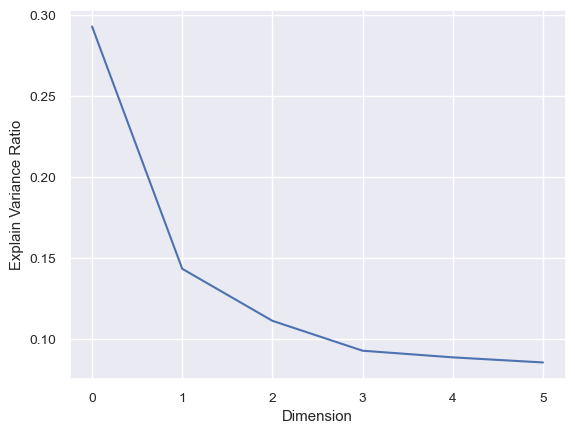

In [31]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

In [34]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [36]:
accuracy = clf_svc_pca.score(x_test, y_test)
print(accuracy)

0.45714285714285713


## Now we will reduce the dimensionality to 1 dimension

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, whiten=True)
X_reduced = pca.fit_transform(X)

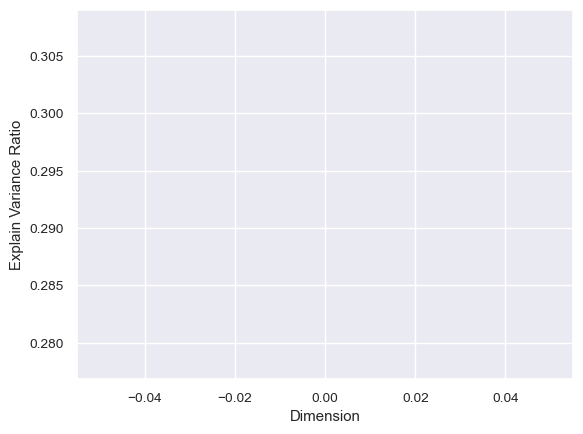

In [39]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

In [42]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [43]:
accuracy = clf_svc_pca.score(x_test, y_test)
print(accuracy)

0.44081632653061226


## We notice that the ACCURACY is much closer to the 49% when all dimensions are used than the expected 14% from random guesses which means they're not that much useful in the prediction.